<a href="https://colab.research.google.com/github/JUANOSORIOG/Senales_y_Sistemas/blob/main/Taller_2_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUNTO 3**

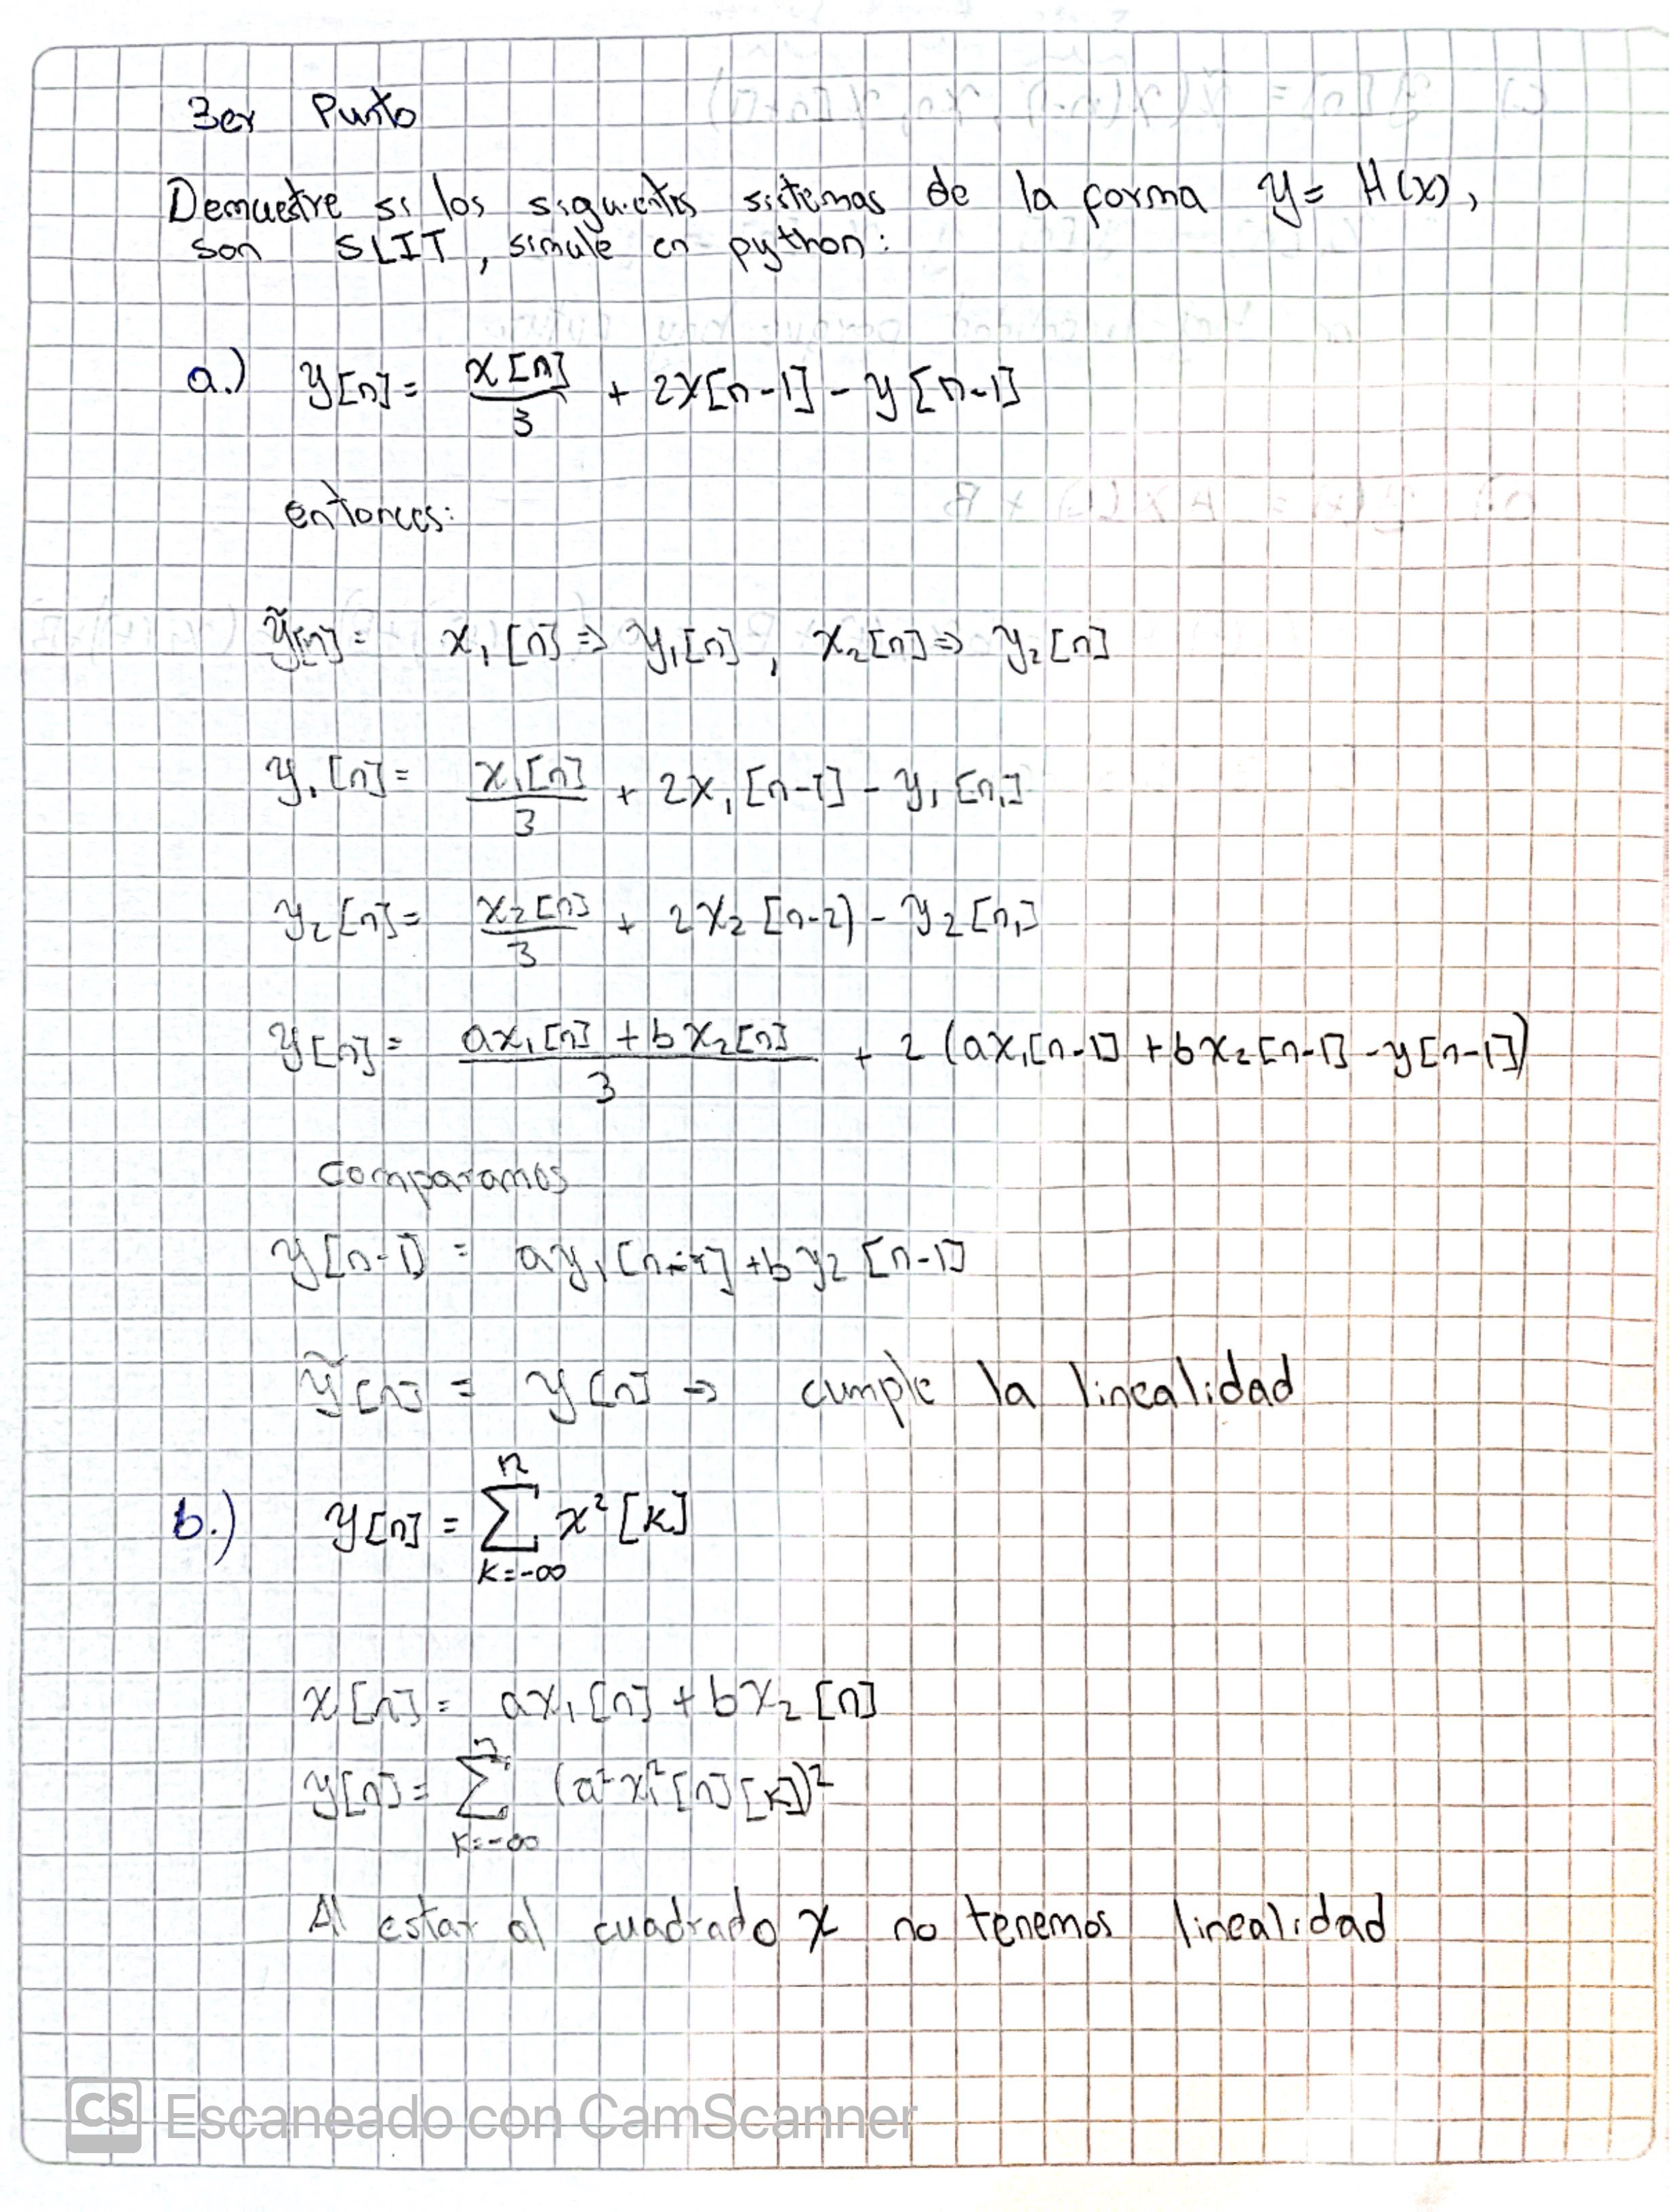

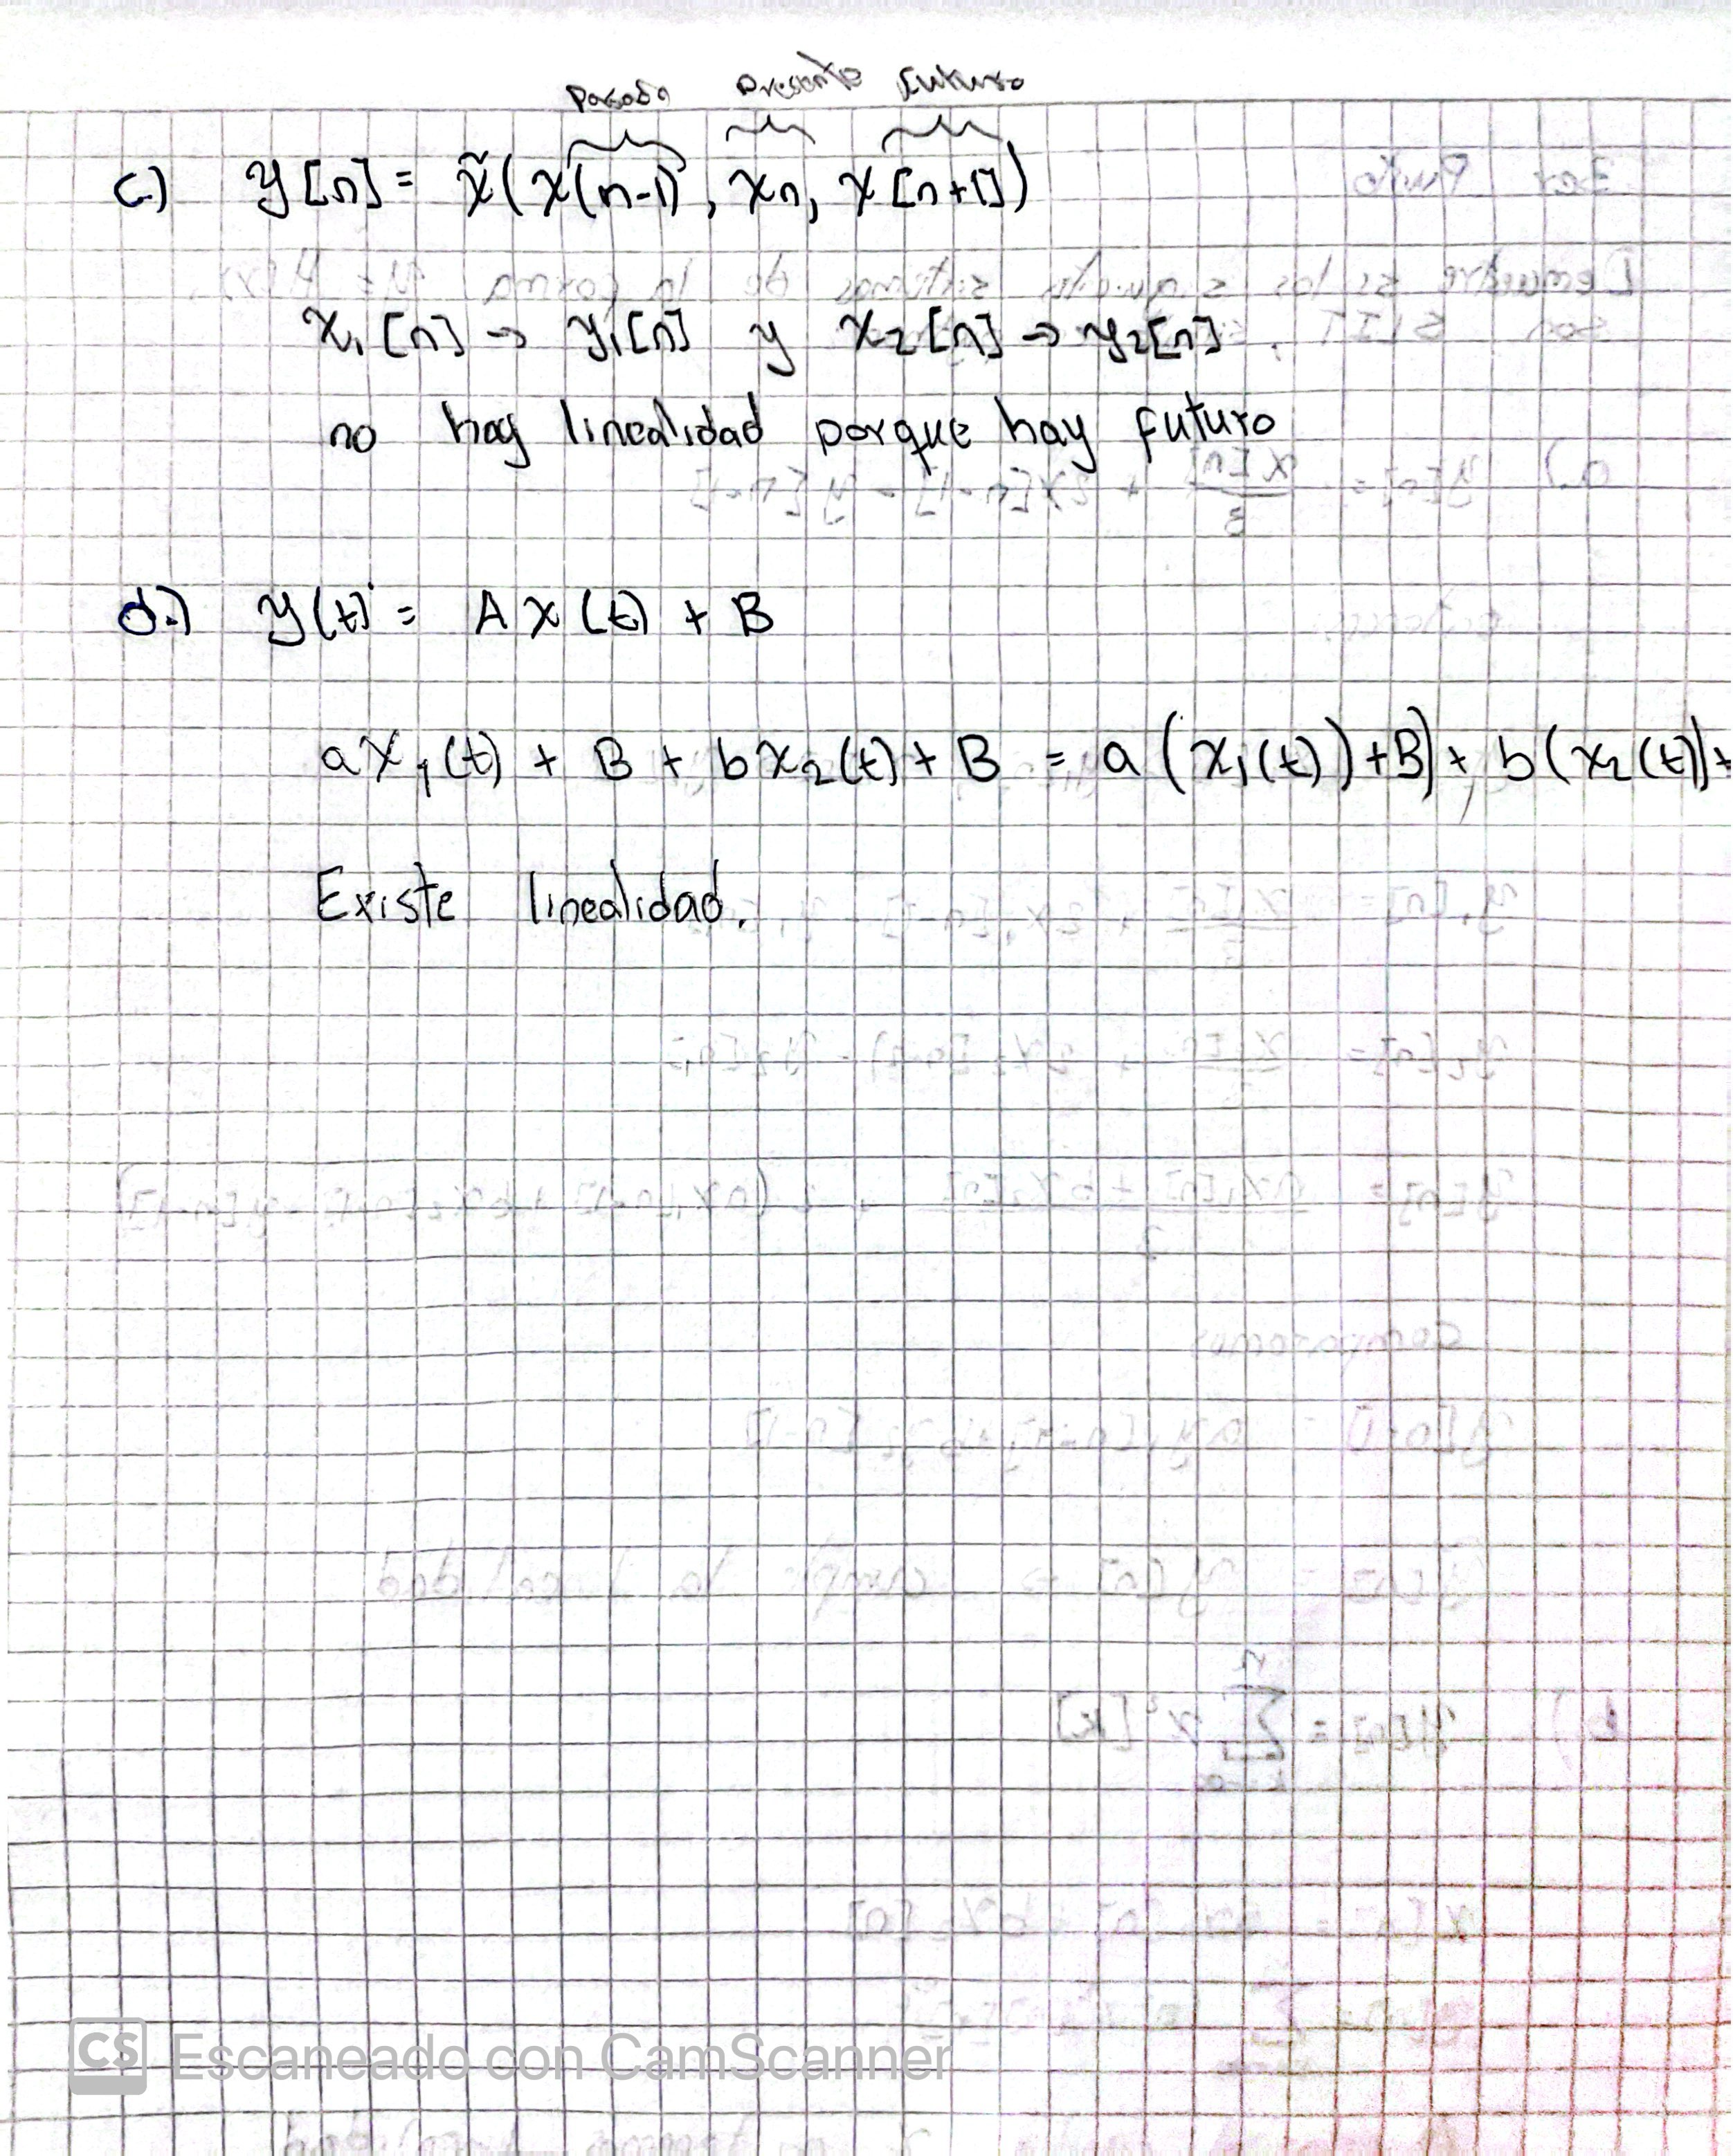

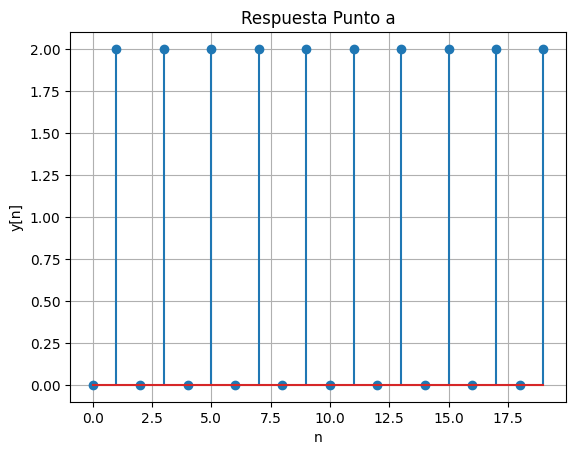

In [2]:
# Punto a
import numpy as np
import matplotlib.pyplot as plt

def sistema1(x):
    y = np.zeros_like(x)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Señal prueba
n = np.arange(0, 20)
x = np.ones_like(n)  # escalón unitario
y = sistema1(x)

plt.stem(n, y)
plt.title("Respuesta Punto a")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

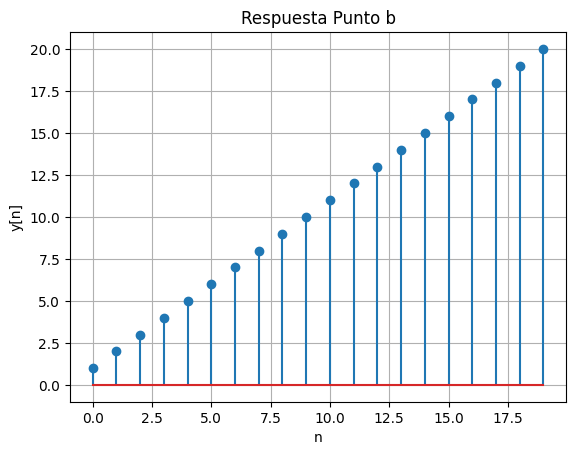

In [3]:
# Punto b
def sistema2(x):
    y = np.zeros_like(x)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

x = np.ones_like(n)
y = sistema2(x)

# Gráfica
plt.stem(n, y)
plt.title("Respuesta Punto b")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

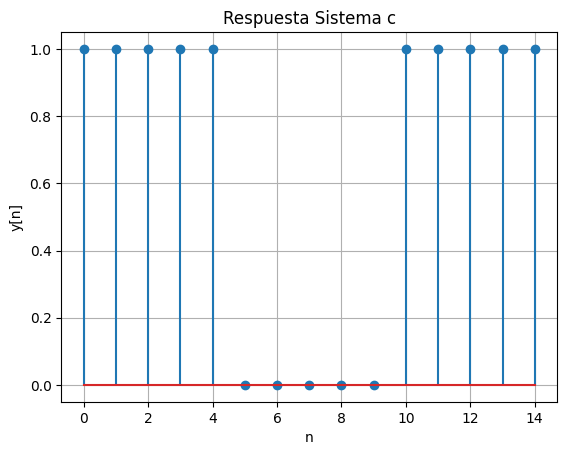

In [4]:
# SISTEMA c
from scipy.signal import medfilt
import numpy as np # Import numpy as it's used later
import matplotlib.pyplot as plt # Import matplotlib as it's used later

def sistema3(x):
    return medfilt(x, kernel_size=3)

x = np.concatenate((np.ones(5), np.zeros(5), np.ones(5)))
y = sistema3(x)

plt.stem(np.arange(len(x)), y)
plt.title("Respuesta Sistema c")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

• y(t) = Ax(t) + B; A, B ∈ R.

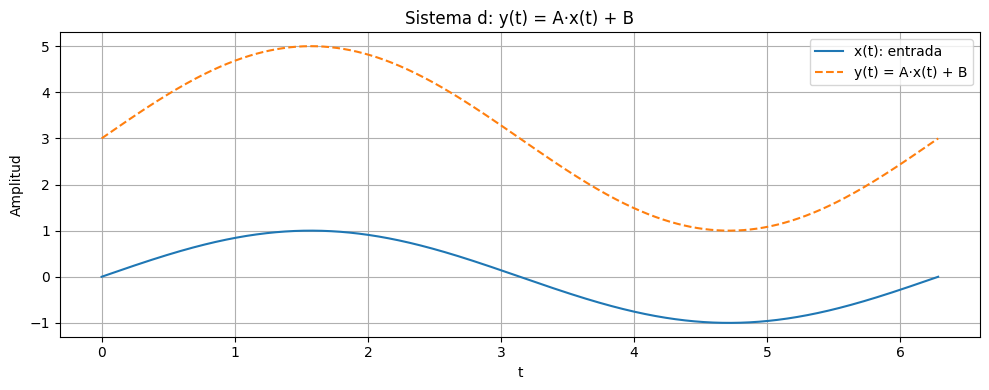

In [5]:
# SISTEMA d
import numpy as np
import matplotlib.pyplot as plt

# Definimos parámetros del sistema
A = 2
B = 3

# Señal de entrada x(t): por ejemplo, una onda senoidal
t = np.linspace(0, 2*np.pi, 1000)
x = np.sin(t)

# Aplicamos el sistema: y(t) = A * x(t) + B
y = A * x + B

plt.figure(figsize=(10, 4))
plt.plot(t, x, label='x(t): entrada')
plt.plot(t, y, label='y(t) = A·x(t) + B', linestyle='--')
plt.title("Sistema d: y(t) = A·x(t) + B")
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Punto 4

Hallar la salida $y[n]$ de un SLIT ante la entrada

$$x[n]={−15, 5, −3†, 0, 5, 7, −1}$$
con respuesta al impulso

$$h[n]={1, −2, 0†, 1, −2}$$
donde $n∈{0, ±1, ±2, . . . , ±N} $yn=0 para $x[n]$
†
- Nota: Utilizar metodo gráfico para encontrar la salida y comprobar con simulacion en Python. Repita el proceso para el sistema con respuesta al escalon ́{−1, 6, −10, 3†, 1, −10, 2, 5}


In [6]:
#Importar y configuracion interactiva
%matplotlib inline
from ipywidgets import interact #crear graficos interactivos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #crear señales prototipo en tiempo discreto

# Entrada x[n] y respuesta al impulso h[n] definicion de señales correctas
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)  # n=0 está en índice 2
h = np.array([1, -2, 0, 1, -2]).reshape(-1, 1)          # n=0 está en índice 2

In [7]:
#Definicion de convgraf y plot_conv
def convgraf(h, x):
    lx = len(x)
    lh = len(h)
    M = lx + lh - 1  # longitud de la salida
    xm = np.zeros((lh, M))  # almacenamiento de x reflejado y desplazado
    ym = np.zeros(M)        # salida final

    # Reflejar x[k] -> x[-k]
    x_flip = np.flip(x, axis=0).flatten()

    for i in range(M):
        # Desplazar x_flip para formar x[k] en n = i
        x_shift = np.zeros(lh)
        for j in range(lh):
            if 0 <= i - j < lx:
                x_shift[j] = x_flip[i - j]
        xm[:, i] = x_shift
        ym[i] = np.dot(x_shift, h.flatten())  # producto punto

    return xm, ym, h

In [8]:
def plot_conv(k, xm, ym, h):
    plt.figure(figsize=(10, 5))

    plt.stem(xm[:, k], markerfmt='+', label='$x[k]$ desplazado')  # x reflejado y desplazado
    plt.stem(h, linefmt='g', markerfmt='.', label='$h[n-k]$')     # h fija
    plt.stem(ym[:k+1], markerfmt='s', linefmt='r', label='$y[n]$ acumulada')  # salida parcial

    plt.title('Proceso de convolución: $y[n] = x[n] * h[n]$', fontsize=14)
    plt.xlabel('n (índice de tiempo discreto)', fontsize=12)
    plt.ylabel('Amplitud', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
xm, ym, h_used = convgraf(h, x)

@interact(k=(0, len(ym)-1, 1))
def show_frame(k=0):
    plot_conv(k, xm, ym, h_used)


interactive(children=(IntSlider(value=0, description='k', max=10), Output()), _dom_classes=('widget-interact',…

In [10]:
# Calcular índice de n=0 en la salida
n0_x = 2  # n=0 en x
n0_h = 2  # n=0 en h
n0_y = n0_x + n0_h  # n=0 en y

# Crear eje temporal para y[n]
n_y = np.arange(-n0_y, len(ym) - n0_y)

# Mostrar resultados
print("Salida completa de la convolución y[n]:\n")
for n_val, y_val in zip(n_y, ym):
    print(f"n = {n_val:>2} --> y[n] = {y_val:>6.1f}")

Salida completa de la convolución y[n]:

n = -4 --> y[n] =   -1.0
n = -3 --> y[n] =    9.0
n = -2 --> y[n] =   -9.0
n = -1 --> y[n] =  -11.0
n =  0 --> y[n] =    6.0
n =  1 --> y[n] =    2.0
n =  2 --> y[n] =  -35.0
n =  3 --> y[n] =   27.0
n =  4 --> y[n] =   11.0
n =  5 --> y[n] =  -25.0
n =  6 --> y[n] =   30.0


### Parte 2: Respuesta al escalón

In [11]:
# Nueva respuesta al escalón s[n]
s = np.array([-1, 6, -10, 3, 1, -10, 2, 5]).reshape(-1, 1)  # n = 0 en índice 3

# Convolución con la nueva "respuesta al sistema"
def convgraf_step(s, x):
    lx = len(x)
    lh = len(s)
    M = lx + lh - 1
    xm = np.zeros((lh, M))
    ym = np.zeros(M)

    x_flip = np.flip(x, axis=0).flatten()

    for i in range(M):
        x_shift = np.zeros(lh)
        for j in range(lh):
            if 0 <= i - j < lx:
                x_shift[j] = x_flip[i - j]
        xm[:, i] = x_shift
        ym[i] = np.dot(x_shift, s.flatten())

    return xm, ym, s

# Ejecutamos
xm_step, ym_step, s_used = convgraf_step(s, x)

# Visualización paso a paso con etiquetas
def plot_step(k, xm, ym, s):
    plt.figure(figsize=(10, 5))
    plt.stem(xm[:, k], markerfmt='+', label='$x[k]$ desplazado')
    plt.stem(s, linefmt='g', markerfmt='.', label='$s[n-k]$')
    plt.stem(ym[:k+1], markerfmt='s', linefmt='r', label='$y[n]$')
    plt.title('Convolución con respuesta al escalón: $y[n] = x[n] * s[n]$', fontsize=14)
    plt.xlabel('n (índice de tiempo discreto)', fontsize=12)
    plt.ylabel('Amplitud', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Widget interactivo
@interact(k=(0, len(ym_step)-1, 1))
def show_step_frame(k=0):
    plot_step(k, xm_step, ym_step, s_used)

interactive(children=(IntSlider(value=0, description='k', max=13), Output()), _dom_classes=('widget-interact',…